## import library

In [1]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Load Data

In [2]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
#60,000 img information and return 
#28 rows
#28 columns
xtrain.shape

(60000, 28, 28)

In [4]:
#return imgs imformation
ytrain.shape

(60000,)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:
ytest.shape

(10000,)

In [7]:
#firstly return numeric format data and array.you can imagin total 28 rows and 28 columns return.
# 0 means totally white pixel
#and 255 value is exactly back colour.
#this dataset is black and white images. 
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
#return 9 means;this is class_lables.each index store labels.
ytrain[0]    #-------->0 means;checking 0 index label.
#0 -> T-shirt/top 
#1 -> Trouser 
#2 -> Pullover 
#3 -> Dress 
#4 -> Coat 
#5 -> Sandal 
#6 -> Shirt 
#7 -> Sneaker 
#8 -> Bag 
#9 -> Ankle boot 

9

In [9]:
class_labels=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

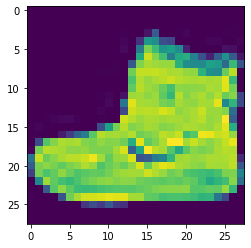

In [10]:
#this imshow function used to xtrain data means(numeric format) then i converted in pixel format to use the imshow function.
#and this return img is very blur because resolution is 28/28 
plt.imshow(xtrain[0])

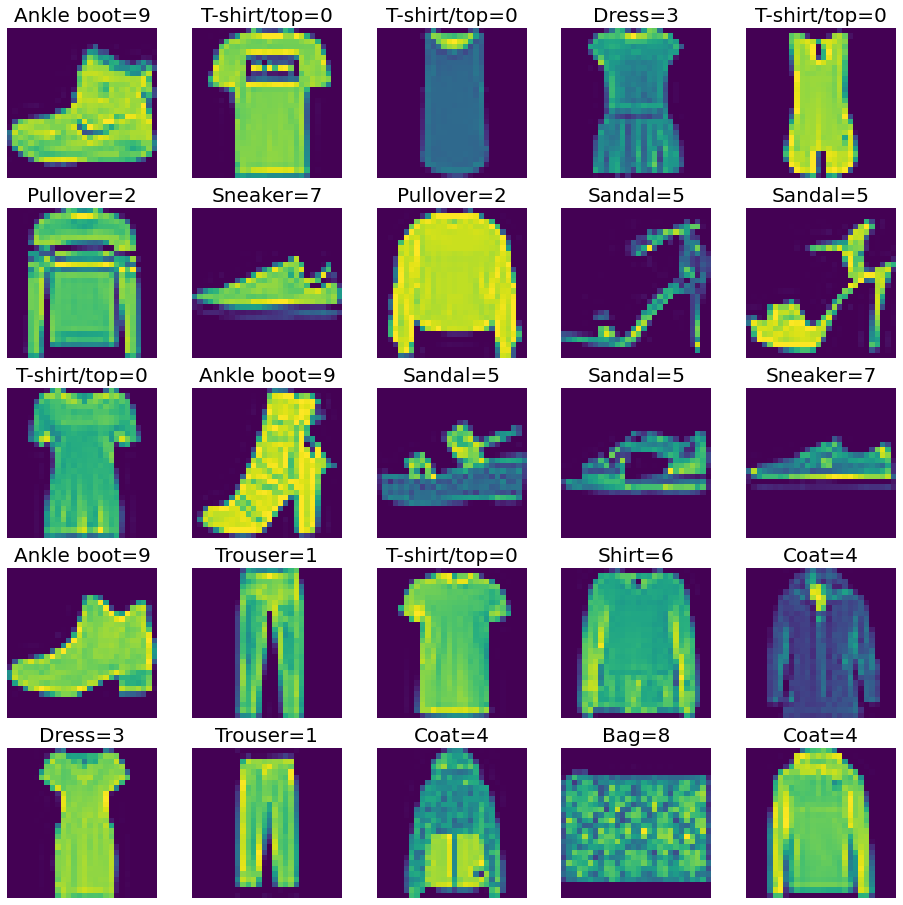

In [11]:
#total 25 return img and lables.this 25 images pass to neural network 
#then i train the data can any use one img.after my netural network classifying img.
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(xtrain[i])
  plt.axis("off")
  plt.title(class_labels[ytrain[i]]+"="+str(ytrain[i]),fontsize=20)

## feature scalling 

In [12]:
#0 to 255 values the after i try to normalize.
#to converted 0 to 1 range values.
xtrain=xtrain/255
xtest=xtest/255


In [13]:
#this is 0 index label images.and return values range is 0 to 1.
xtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Build Neural Network

In [14]:
model=keras.models.Sequential([
                         keras.layers.Flatten(input_shape=[28,28]),
                         keras.layers.Dense(units=32, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [15]:
#return flatten layer shape id total 784 input and parameter value is 0.
#dense layer shape is 32 input means;i mention the input and parameter value is 25120. 
#dense_1 layer shape is 10 mean this output layer and parameter value is 330.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [16]:
#after then my model is compile process optimzer is adms,
#loss is using sparse_categorical_crossentropy because i perform classfiction problem.
#then i find loss after then i find accuracy i using merics.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history=model.fit(xtrain,ytrain,batch_size=64,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.2471 - accuracy: 0.9091 - val_loss: 0.2669 - val_accuracy: 0.8989
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2462 - accuracy: 0.9089 - val_loss: 0.2513 - val_accuracy: 0.9072
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2435 - accuracy: 0.9114 - val_loss: 0.2828 - val_accuracy: 0.8959
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2431 - accuracy: 0.9101 - val_loss: 0.2571 - val_accuracy: 0.9028
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2403 - accuracy: 0.9113 - val_loss: 0.2628 - val_accuracy: 0.9023
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2388 - accuracy: 0.9128 - val_loss: 0.2659 - val_accuracy: 0.9010
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2347 - accuracy: 0.9133 - val_loss: 0.2649 - val_accuracy: 0.9024
Epoch 

In [17]:
#then training my neural network
model.fit(xtrain,ytrain,epochs=5)   #---->epochs means;iteration 

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5504 - accuracy: 0.8119
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4087 - accuracy: 0.8555
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3745 - accuracy: 0.8682
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3511 - accuracy: 0.8743
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3364 - accuracy: 0.8804


In [18]:
#after update the epochs values 10 then loss is slowly each epochs is decreasing value and show me.
#and accuracy is improving.
model.fit(xtrain,ytrain,epochs=10)       #--------->#---->epochs means;iteration 

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3239 - accuracy: 0.8823
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3167 - accuracy: 0.8857
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3065 - accuracy: 0.8897
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.8924
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2919 - accuracy: 0.8937
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2861 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2807 - accuracy: 0.8970
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2745 - accuracy: 0.8997
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2723 - accuracy: 0.9001
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.266

## Test and Evaluate Neural Network Model

In [19]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 1ms/step - loss: 0.3717 - accuracy: 0.8707


[0.37170493602752686, 0.8707000017166138]

In [20]:
ypred=model.predict(xtest)

313/313 [==============================] - 0s 1ms/step


In [21]:
#there are return 10 classes you can imaging max value return 9th number of class predicted to neural network 
ypred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
      dtype=float32)

In [22]:
#i find the index of 9th class labels
#and return index number 
np.argmax(ypred[0].round(2))

9

In [23]:
#check the 9th index.

#0 -> T-shirt/top 
#1 -> Trouser 
#2 -> Pullover 
#3 -> Dress 
#4 -> Coat 
#5 -> Sandal 
#6 -> Shirt 
#7 -> Sneaker 
#8 -> Bag 
#9 -> Ankle boot 

In [24]:
#i check to the actual values.
ytest[0]

9

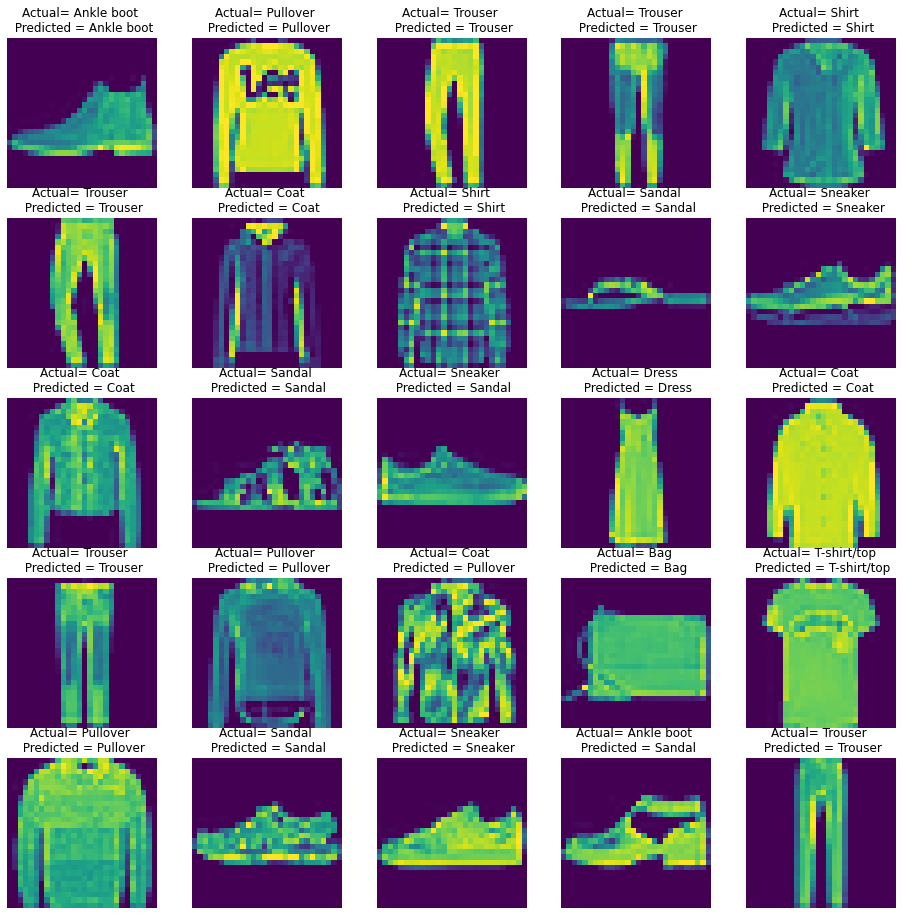

In [25]:
#look at this all img actual values and predicted values
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(xtest[i],)
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[ytest[i]], class_labels[np.argmax(ypred[i])]))

## Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,[np.argmax(i) for i in ypred])

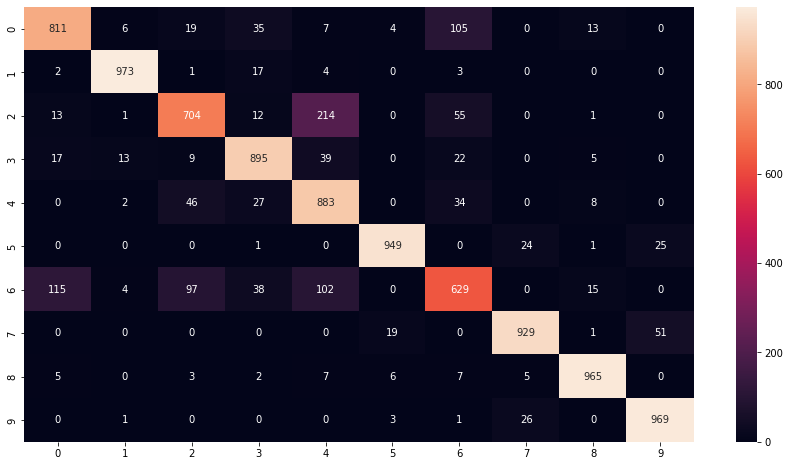

In [27]:
#draw a heatmap plot.
plt.figure(figsize=(15,8))
sns.heatmap(cm,annot=True,fmt="d")

## Classification report

In [28]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,[np.argmax(i) for i in ypred],target_names=class_labels)

In [29]:
#all class labels are return precision,recall,f1-score
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.81      0.83      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.80      0.70      0.75      1000
       Dress       0.87      0.90      0.88      1000
        Coat       0.70      0.88      0.78      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.73      0.63      0.68      1000
     Sneaker       0.94      0.93      0.94      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.93      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



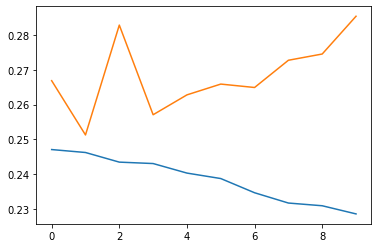

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

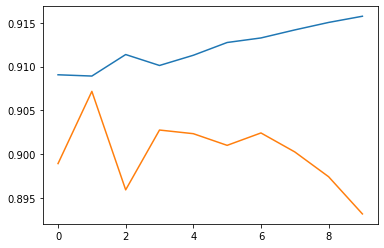

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])